# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [3]:
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Added the time variable to use with time.gmtime to calculate the date
        city_time = time.gmtime(city_weather['dt'])
        city_date = f"{city_time[0]}-{city_time[1]}-{city_time[2]}"

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la passe


Processing Record 2 of Set 1 | yunyang
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | susuman
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | rundu
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | pitomaca
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | kulia village
City not found. Skipping...
Processing Record 21 of Set 1 | inarajan village
Processing Record 22 of Set 1 | aldan
Processing Record 23 of Set 1 | lihue
Processing Record 24 of Set 1 | noshiro
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Temp is returned in Kelvin. Minus 273.15 to get temp in celsius
city_data_df['Max Temp'] = round(city_data_df['Max Temp'] - 273.15, 2)

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la passe,45.5549,-0.8967,10.55,75,100,10.46,FR,2024-2-10
1,yunyang,33.4474,112.7142,15.50,24,26,5.04,CN,2024-2-10
2,hawaiian paradise park,19.5933,-154.9731,21.13,95,50,5.19,US,2024-2-10
3,grytviken,-54.2811,-36.5092,2.73,97,100,9.42,GS,2024-2-10
4,adamstown,-25.0660,-130.1015,24.89,93,100,13.42,PN,2024-2-10


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la passe,45.5549,-0.8967,10.55,75,100,10.46,FR,2024-2-10
1,yunyang,33.4474,112.7142,15.50,24,26,5.04,CN,2024-2-10
2,hawaiian paradise park,19.5933,-154.9731,21.13,95,50,5.19,US,2024-2-10
3,grytviken,-54.2811,-36.5092,2.73,97,100,9.42,GS,2024-2-10
4,adamstown,-25.0660,-130.1015,24.89,93,100,13.42,PN,2024-2-10


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

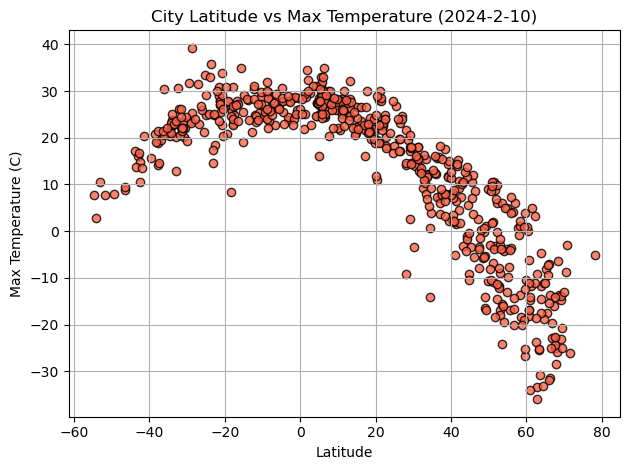

In [10]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# Save the figure
x_label = city_data_df['Lat']
y_label = city_data_df['Max Temp']
plt.scatter(x_label, y_label, c = 'tomato', alpha = 0.80, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs Max Temperature ({city_data_df['Date'][0]})")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Fig1.png")
plt.show()

# Show plot
plt.show()

#### Latitude Vs. Humidity

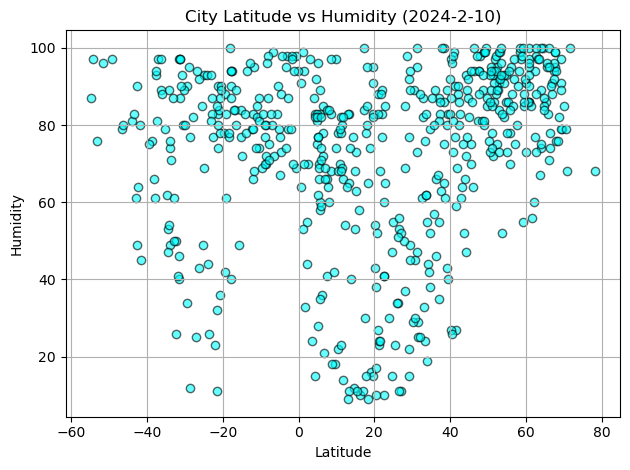

In [11]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
# Save the figure
y_label = city_data_df['Humidity']
plt.scatter(x_label, y_label, c = 'cyan', alpha = 0.60, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"City Latitude vs Humidity ({city_data_df['Date'][0]})")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

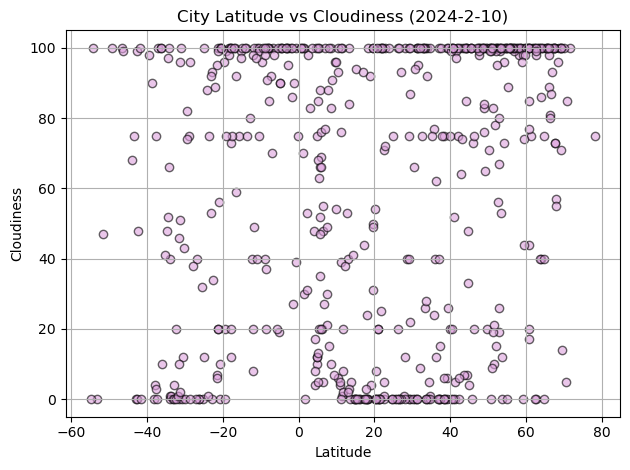

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
# Save the figure

y_label = city_data_df['Cloudiness']
plt.scatter(x_label, y_label, c = 'plum', alpha = 0.60, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f"City Latitude vs Cloudiness ({city_data_df['Date'][0]})")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

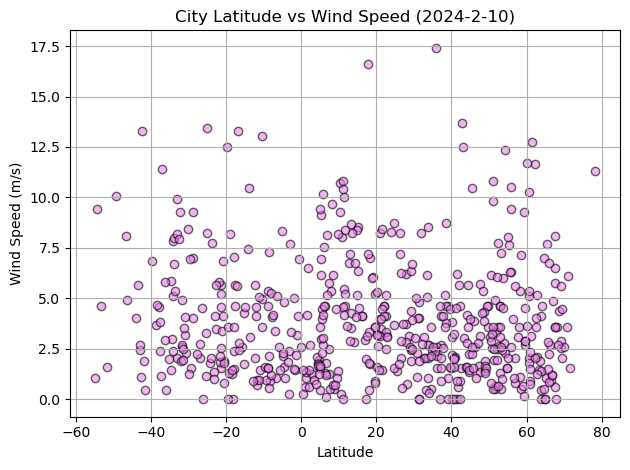

In [13]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
# Save the figure

y_label = city_data_df['Wind Speed']
plt.scatter(x_label, y_label, c = 'violet', alpha = 0.60, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed ({city_data_df['Date'][0]})")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regress_func(xval, yval):
    plt.scatter(xval, yval, c = 'turquoise', edgecolors = 'black')
    slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.tight_layout()
    plt.annotate(line_eq, (0, 1), xycoords = 'axes fraction', fontsize=15,color="red")
    plt.plot(xval, regress_values, "r-")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0].reset_index(drop = True)

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la passe,45.5549,-0.8967,10.55,75,100,10.46,FR,2024-2-10
1,yunyang,33.4474,112.7142,15.50,24,26,5.04,CN,2024-2-10
2,hawaiian paradise park,19.5933,-154.9731,21.13,95,50,5.19,US,2024-2-10
3,keflavik,64.0049,-22.5624,-4.76,74,40,4.63,IS,2024-2-10
4,susuman,62.7833,148.1667,-33.36,98,98,2.11,RU,2024-2-10
...,...,...,...,...,...,...,...,...,...
393,tougan,13.0667,-3.0667,23.77,9,2,2.87,BF,2024-2-10
394,ain el bya,35.8039,-0.3018,16.16,80,24,17.41,DZ,2024-2-10
395,nha trang,12.2500,109.1833,28.00,54,38,3.63,VN,2024-2-10
396,dzuunharaa,48.8523,106.4579,-5.45,81,76,1.32,MN,2024-2-10


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0].reset_index(drop = True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.73,97,100,9.42,GS,2024-2-10
1,adamstown,-25.0660,-130.1015,24.89,93,100,13.42,PN,2024-2-10
2,puerto ayora,-0.7393,-90.3518,25.86,98,39,4.14,EC,2024-2-10
3,port-aux-francais,-49.3500,70.2167,7.94,97,100,10.08,TF,2024-2-10
4,rundu,-17.9333,19.7667,30.90,40,73,1.48,NaN,2024-2-10


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.814436448079368


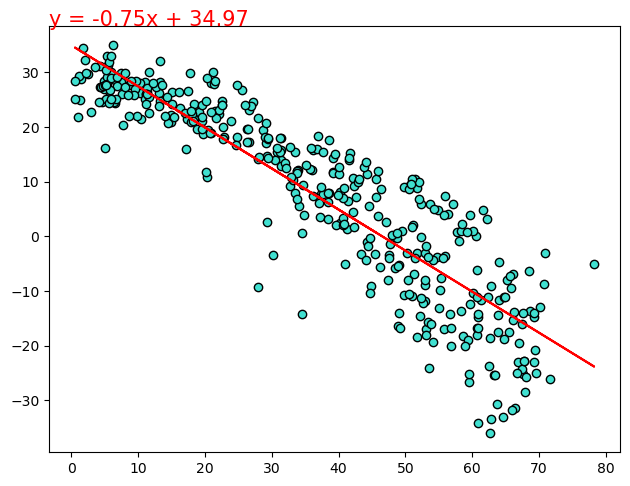

In [17]:
# Linear regression on Northern Hemisphere
regress_func(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-value is: 0.3804457272797897


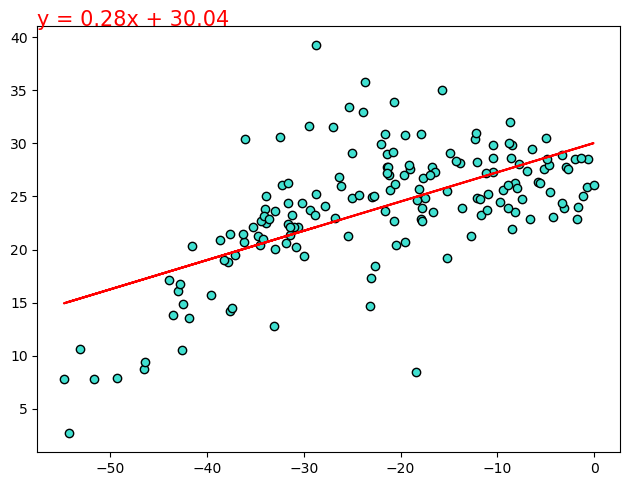

In [18]:
# Linear regression on Southern Hemisphere
regress_func(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19689789468901162


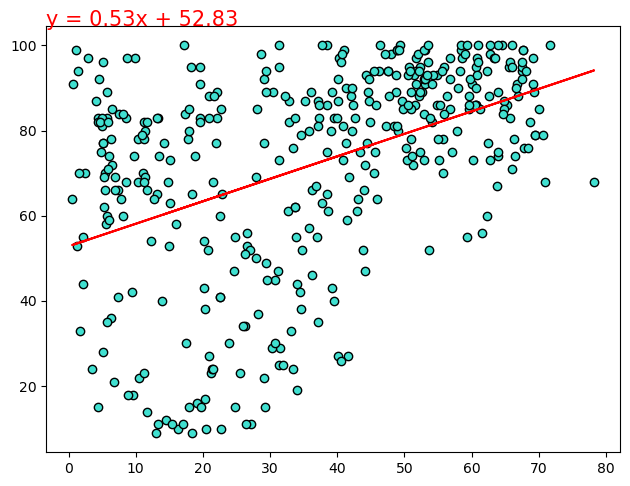

In [19]:
# Northern Hemisphere
regress_func(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-value is: 0.024171285614422104


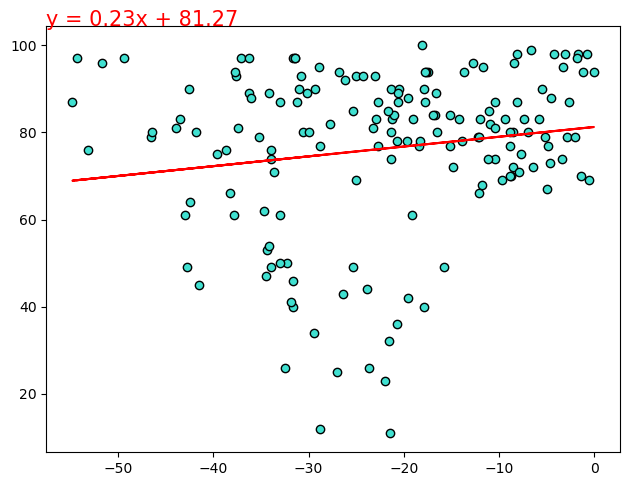

In [20]:
# Southern Hemisphere
regress_func(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11303489178775922


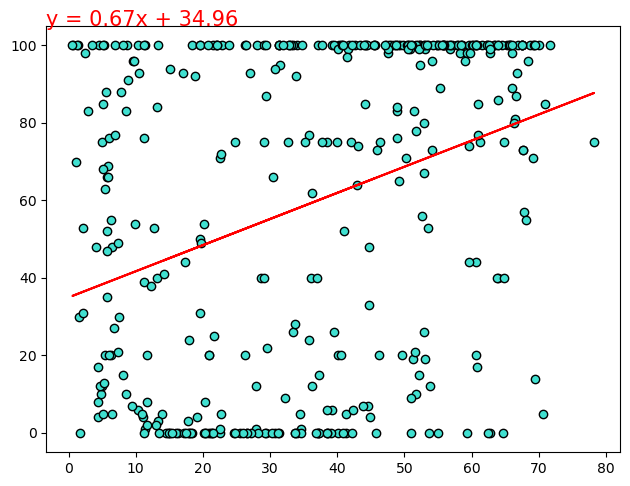

In [21]:
# Northern Hemisphere
regress_func(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.12824126155965235


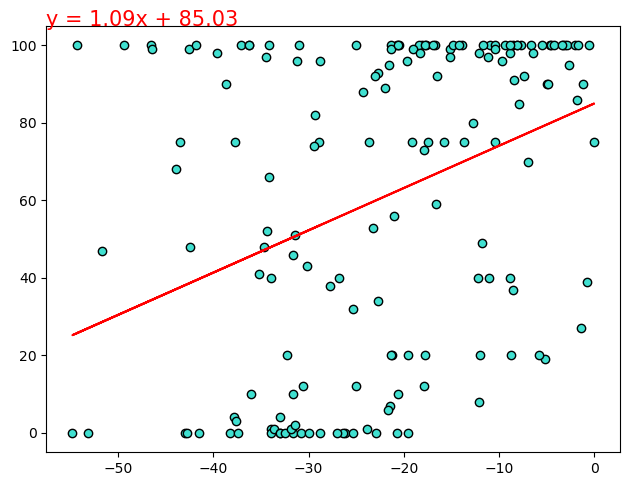

In [22]:
# Southern Hemisphere
regress_func(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002418677952351411


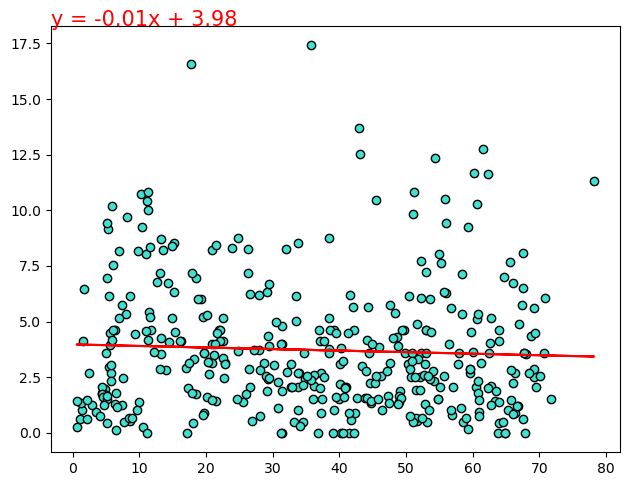

In [23]:
# Northern Hemisphere
regress_func(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: 0.030274331213309403


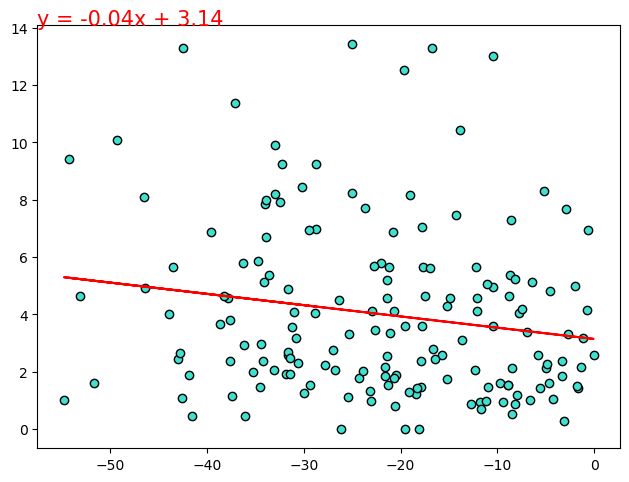

In [24]:
# Southern Hemisphere
regress_func(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE